In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import re

In [2]:
data = pd.read_csv('2018.csv')
pd.set_option('display.max_columns', 33)

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 749 entries, 0 to 748
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           749 non-null    object 
 1   Age                                 671 non-null    float64
 2   Gender                              746 non-null    object 
 3   City                                731 non-null    object 
 4   Position                            737 non-null    object 
 5   Years of experience                 731 non-null    float64
 6   Your level                          740 non-null    object 
 7   Current Salary                      748 non-null    float64
 8   Salary one year ago                 596 non-null    float64
 9   Salary two years ago                463 non-null    float64
 10  Are you getting any Stock Options?  740 non-null    object 
 11  Main language at work               748 non-n

In [4]:
data.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,671.000000,731.000000,748.000000,596.000000,463.000000
mean,32.184799,8.558824,68402.839572,62187.278523,58013.475162
std,5.110873,4.724531,21215.039710,20163.008663,20413.048908
min,21.000000,0.000000,10300.000000,10001.000000,10001.000000
25%,29.000000,5.000000,57000.000000,52000.000000,48000.000000
50%,32.000000,8.000000,65000.000000,60000.000000,56000.000000
75%,35.000000,11.000000,75000.000000,70000.000000,67000.000000
max,60.000000,38.000000,200000.000000,200000.000000,150000.000000


In [5]:
missing_values = data.isna()
print(missing_values[missing_values > 0])

    Timestamp   Age Gender City Position Years of experience Your level  \
0         NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
1         NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
2         NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
3         NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
4         NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
..        ...   ...    ...  ...      ...                 ...        ...   
744       NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
745       NaN   NaN    NaN  NaN      NaN                 NaN        NaN   
746       NaN  True    NaN  NaN      NaN                 NaN        NaN   
747       NaN  True    NaN  NaN      NaN                 NaN        NaN   
748       NaN   NaN    NaN  NaN      NaN                 NaN        NaN   

    Current Salary Salary one year ago Salary two years ago  \
0              NaN                 N

In [7]:
data_cleaned = data.dropna()

In [8]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
Index: 368 entries, 0 to 745
Data columns (total 14 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Timestamp                           368 non-null    object 
 1   Age                                 368 non-null    float64
 2   Gender                              368 non-null    object 
 3   City                                368 non-null    object 
 4   Position                            368 non-null    object 
 5   Years of experience                 368 non-null    float64
 6   Your level                          368 non-null    object 
 7   Current Salary                      368 non-null    float64
 8   Salary one year ago                 368 non-null    float64
 9   Salary two years ago                368 non-null    float64
 10  Are you getting any Stock Options?  368 non-null    object 
 11  Main language at work               368 non-null  

In [9]:
missing_values = data_cleaned.isna()
print(missing_values[missing_values > 0])

    Timestamp  Age Gender City Position Years of experience Your level  \
0         NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
1         NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
2         NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
3         NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
4         NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
..        ...  ...    ...  ...      ...                 ...        ...   
732       NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
733       NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
737       NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
744       NaN  NaN    NaN  NaN      NaN                 NaN        NaN   
745       NaN  NaN    NaN  NaN      NaN                 NaN        NaN   

    Current Salary Salary one year ago Salary two years ago  \
0              NaN                 NaN          

In [10]:
data_cleaned.describe()

,Age,Years of experience,Current Salary,Salary one year ago,Salary two years ago
count,368.000000,368.000000,368.000000,368.000000,368.000000
mean,32.891304,9.339674,72059.375000,63758.372283,57723.866848
std,5.025725,4.514295,21444.274158,20320.268274,20282.226524
min,22.000000,0.000000,15000.000000,10001.000000,10001.000000
25%,30.000000,6.000000,60000.000000,55000.000000,48000.000000
50%,32.000000,9.000000,70000.000000,64000.000000,55000.000000
75%,35.000000,12.000000,80000.000000,72000.000000,67000.000000
max,52.000000,30.000000,176000.000000,130000.000000,130000.000000


In [11]:
data_cleaned.head()

,Timestamp,Age,Gender,City,Position,Years of experience,Your level,Current Salary,Salary one year ago,Salary two years ago,Are you getting any Stock Options?,Main language at work,Company size,Company type
0,14/12/2018 12:41:33,43.0,M,München,QA Ingenieur,11.0,Senior,77000.0,76200.0,68000.0,No,Deutsch,100-1000,Product
1,14/12/2018 12:42:09,33.0,F,München,Senior PHP Magento developer,8.0,Senior,65000.0,55000.0,55000.0,No,Deutsch,50-100,Product
2,14/12/2018 12:47:36,32.0,M,München,Software Engineer,10.0,Senior,88000.0,73000.0,54000.0,No,Deutsch,1000+,Product
3,14/12/2018 12:50:15,25.0,M,München,Senior Frontend Developer,6.0,Senior,78000.0,55000.0,45000.0,Yes,English,1000+,Product
4,14/12/2018 12:50:31,39.0,M,München,UX Designer,10.0,Senior,69000.0,60000.0,52000.0,No,English,100-1000,Ecom retailer


In [12]:
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
age = data_cleaned['Age']
salary = data_cleaned['Current Salary']

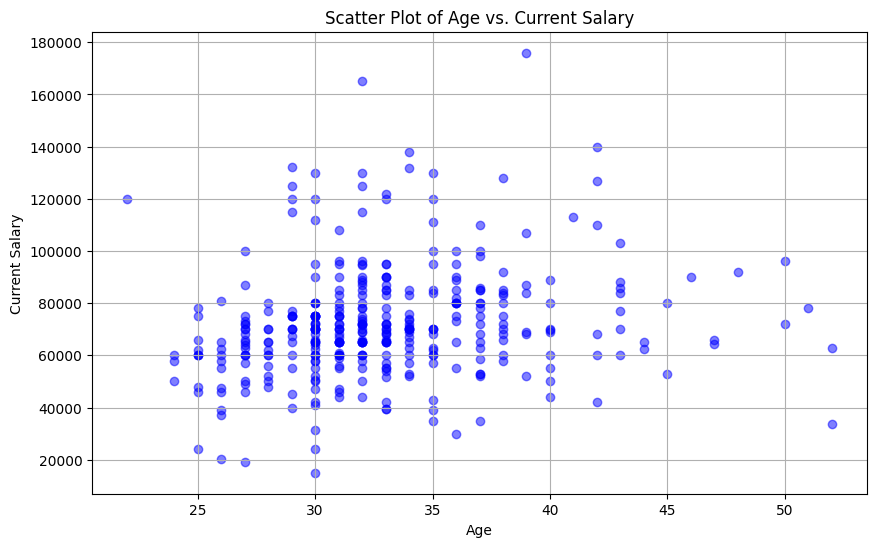

In [14]:
plt.figure(figsize=(10, 6))
plt.scatter(age, salary, alpha=0.5, color='blue')

plt.title('Scatter Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.grid(True)

plt.show()

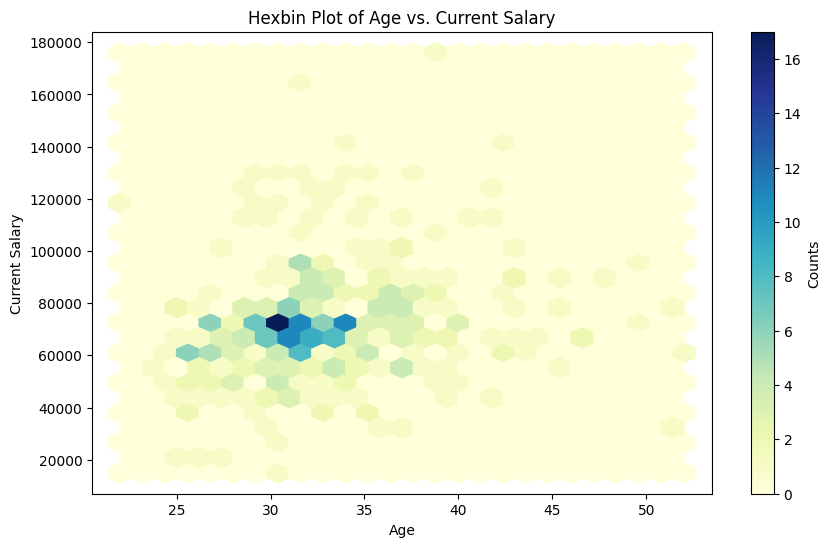

In [15]:

plt.figure(figsize=(10, 6))
plt.hexbin(age, salary, gridsize=25, cmap='YlGnBu')  

plt.title('Hexbin Plot of Age vs. Current Salary')
plt.xlabel('Age')
plt.ylabel('Current Salary')
plt.colorbar(label='Counts')

plt.show()

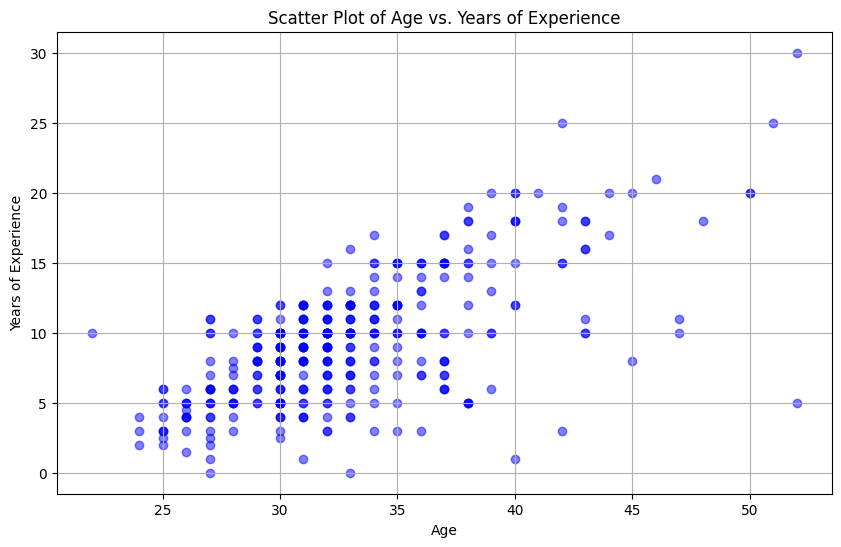

In [16]:
age = data_cleaned['Age']
experience = data_cleaned['Years of experience']

plt.figure(figsize=(10, 6))
plt.scatter(age, experience, c='blue', alpha=0.5)  

plt.title('Scatter Plot of Age vs. Years of Experience')
plt.xlabel('Age')
plt.ylabel('Years of Experience')

plt.grid(True)
plt.show()

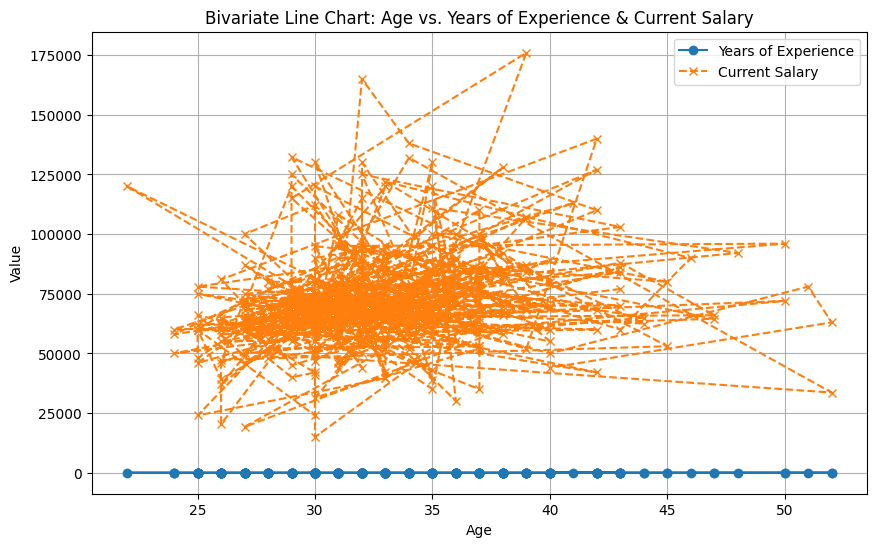

In [17]:
age = data_cleaned['Age']
experience = data_cleaned['Years of experience']
salary = data_cleaned['Current Salary']

plt.figure(figsize=(10, 6))
plt.plot(age, experience, label='Years of Experience', marker='o', linestyle='-')
plt.plot(age, salary, label='Current Salary', marker='x', linestyle='--')

plt.title('Bivariate Line Chart: Age vs. Years of Experience & Current Salary')
plt.xlabel('Age')
plt.ylabel('Value')
plt.legend()

plt.grid(True)
plt.show()

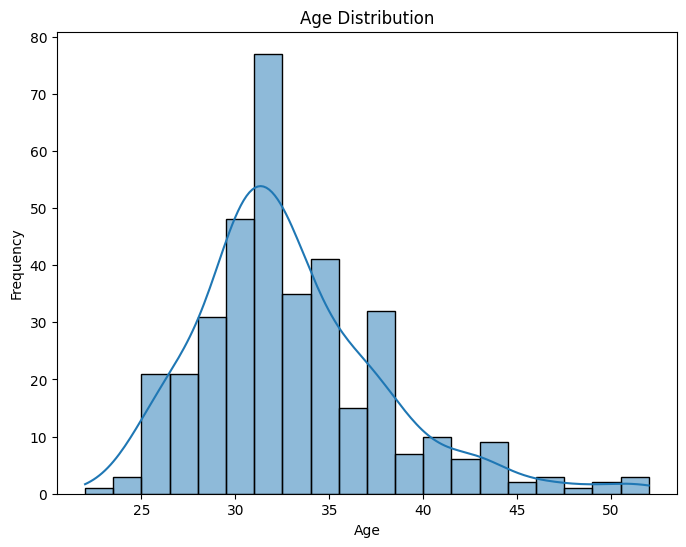

In [18]:
plt.figure(figsize=(8, 6))
sns.histplot(data_cleaned['Age'], bins=20, kde=True)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age Distribution')
plt.show()

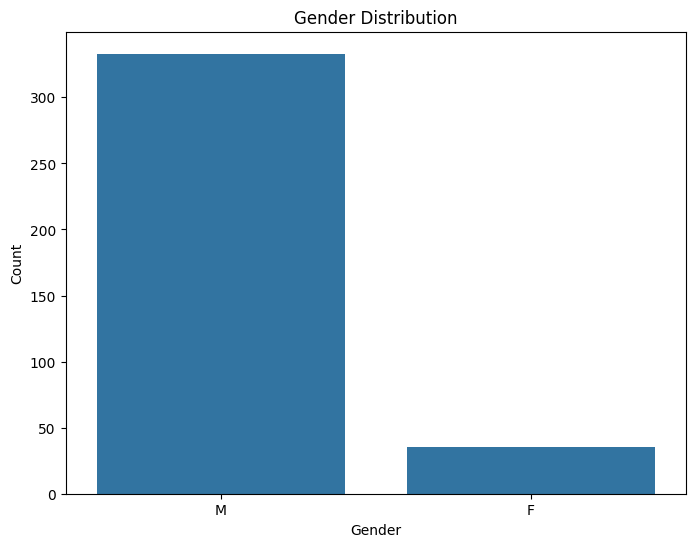

In [19]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data_cleaned, x='Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Gender Distribution')
plt.show()

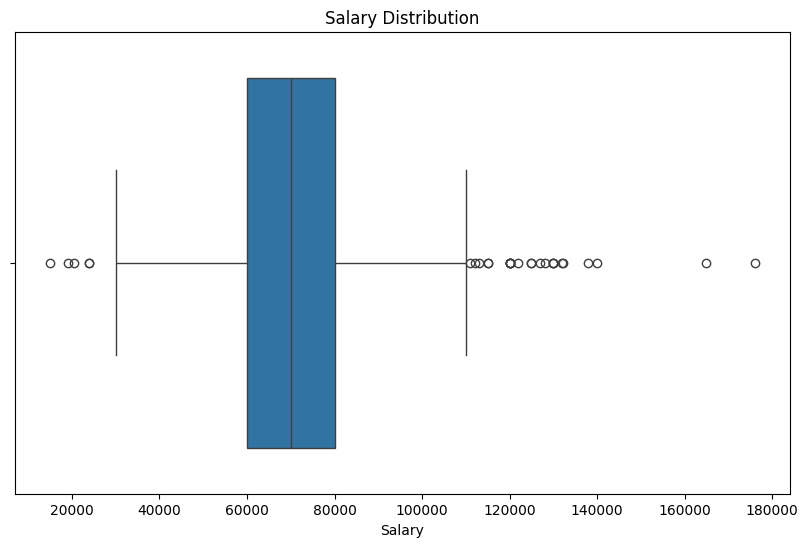

In [20]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=data_cleaned, x='Current Salary')
plt.xlabel('Salary')
plt.title('Salary Distribution')
plt.show()

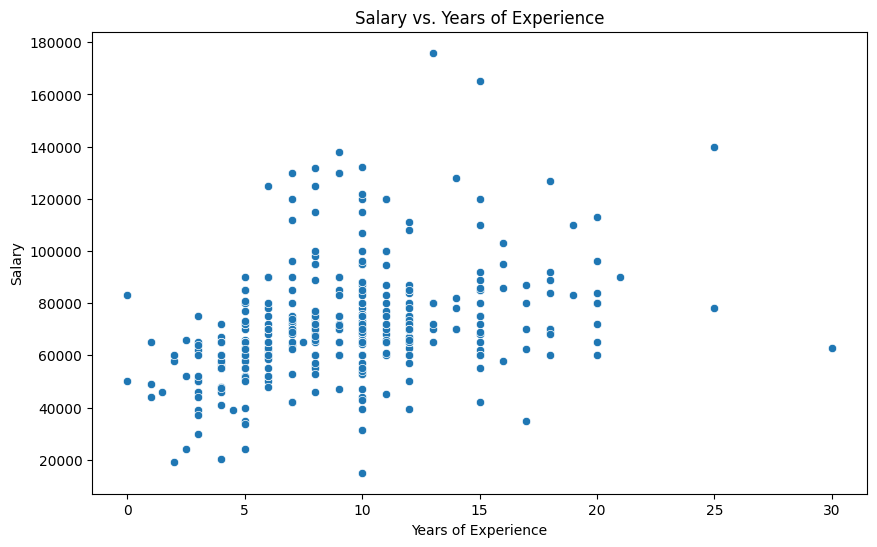

In [21]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=data_cleaned, x='Years of experience', y='Current Salary')
plt.xlabel('Years of Experience')
plt.ylabel('Salary')
plt.title('Salary vs. Years of Experience')
plt.show()